In [4]:
team_id_lookup =  {
                "Los Angeles Angels":108,
                "Arizona Diamondbacks":109,
                "Atlanta Braves":144,
                "Baltimore Orioles":110,
                "Boston Red Sox":111,
                "Chicago Cubs":112,
                "Chicago White Sox":145,
                "Cincinnati Reds":113,
                "Cleveland Guardians":114,
                "Colorado Rockies":115,
                "Detroit Tigers":116,
                "Miami Marlins":146,
                "Houston Astros":117,
                "Kansas City Royals":118,
                "Los Angeles Dodgers":119,
                "Milwaukee Brewers":158,
                "Minnesota Twins":142,
                "New York Mets":121,
                "New York Yankees":147,
                "Oakland Athletics":133,
                "Philadelphia Phillies":143,
                "Pittsburgh Pirates":134,
                "St. Louis Cardinals":138,
                "San Diego Padres":135,
                "San Francisco Giants":137,
                "Seattle Mariners":136,
                "Tampa Bay Rays":139,
                "Texas Rangers":140,
                "Toronto Blue Jays":141,
                "Washington Nationals":120,
            }   

In [3]:
%reset
from GameDay import GameDay #import file which contains GameDay class|

Nothing done.


In [5]:
Game = GameDay() #create instance of class (runs __init__)
Game_DF = Game.GameDay_Wrapper() #DataFrame of list of games for Today

Getting List of Games on 08/28/2022
Matchups, Start Times, Probable Pitchers, and Weather will be added to a DataFrame
Fetching Weather Data: This may take up to 30 seconds
DataFrame of Games on 08/28/2022:                                           Game          Time  \
0          Los Angeles Dodgers @ Miami Marlins   9:05 AM MST   
1       Cincinnati Reds @ Washington Nationals  10:35 AM MST   
2              Tampa Bay Rays @ Boston Red Sox  10:35 AM MST   
3   Pittsburgh Pirates @ Philadelphia Phillies  10:35 AM MST   
4       Los Angeles Angels @ Toronto Blue Jays  10:37 AM MST   
5             Colorado Rockies @ New York Mets  10:40 AM MST   
6           Baltimore Orioles @ Houston Astros  11:10 AM MST   
7        San Diego Padres @ Kansas City Royals  11:10 AM MST   
8       San Francisco Giants @ Minnesota Twins  11:10 AM MST   
9     Arizona Diamondbacks @ Chicago White Sox  11:10 AM MST   
10            Chicago Cubs @ Milwaukee Brewers  11:10 AM MST   
11              Detroit T

In [7]:
CubsGame = Game_DF.iloc[10]
Brewers_Pitcher = CubsGame['Home Pitcher']
Cubs_Pitcher = CubsGame['Away Pitcher']
Matchup = CubsGame['Game']
Matchup = Matchup.split(' @ ')
Home_Team = Matchup[1]
Away_Team = Matchup[0]

print(Brewers_Pitcher)
print(Cubs_Pitcher)
print(Matchup)
print(Home_Team)
print(Away_Team)

Eric Lauer
Adrian Sampson
['Chicago Cubs', 'Milwaukee Brewers']
Milwaukee Brewers
Chicago Cubs


In [9]:
Home_ID = team_id_lookup[Home_Team]
Away_ID = team_id_lookup[Away_Team]

In [10]:
import mysql.connector

In [12]:
#Connect to the SQL Data Base
#cnx is the Connection Object
#cursor is the querying object
import mysql.connector
from bs4 import BeautifulSoup
config = {
'user': 'root',
'password': 'Qdog176782',
'host': '127.0.0.1',
'port': '3306',
'database': 'mlbPlayers',
'raise_on_warnings': True,}

cnx = mysql.connector.connect(**config)    
cursor = cnx.cursor()

In [ ]:
#Example Query
query = "SELECT * FROM playerdetailsmap LIMIT 5"
with cnx.cursor() as cursor:
     cursor.execute(query)
     result = cursor.fetchall()
     for row in result:
         print(row)

In [240]:
query = f"SELECT * FROM playerdetailsmap WHERE MLBNAME LIKE '{Brewers_Pitcher}'"
with cnx.cursor() as cursor:
     cursor.execute(query)
     result = cursor.fetchall()
     for PitcherData in result:
         continue

In [241]:
PitcherData

('lauerer01',
 'Eric Lauer',
 '641778',
 'P',
 'SP/RP',
 'NL',
 'MIL',
 'R',
 'L',
 '39915',
 'Eric Lauer',
 '6/3/95')

In [15]:
Pitcher_ID = PitcherData[2]

In [133]:
from urllib.request import urlopen
import requests
import json


In [115]:
#url ="https://baseballsavant.mlb.com/player_matchup?type=batter&teamPitching=119&teamBatting=112&player_id=664062"

url = "https://baseballsavant.mlb.com/player_matchup?type=batter&teamPitching={Pitching_Team_ID}&teamBatting={Batting_Team_ID}&player_id={Pitcher_ID}"

search = url.format(Pitching_Team_ID = Home_ID, Batting_Team_ID = Away_ID, Pitcher_ID = Pitcher_ID) 


In [ ]:
page = urlopen(search)
html = page.read().decode("utf-8")
print

In [ ]:
import ast
pattern ="var data =.*\\n"
match_results = re.search(pattern,html, re.IGNORECASE)
PvsB = match_results.group()
PvsB = re.sub("var data =", "", PvsB) # Remove HTML tags
PvsB = re.sub(";\n", "", PvsB) # Remove HTML tags
PvsB = re.sub("null","None", PvsB) # Remove HTML tags
PvsB = ast.literal_eval(PvsB)
PvsB



In [229]:
import pandas as pd
team_hitting_data = PvsB['team']
Team_DF = pd.DataFrame({})
player_list = []
pa = []
ab = []
hits = []
dbls = []
triples = []
hr = []
so = []
kpercent = []
whiffpercent = []
bb = []
ba = []
slg = []
xba = []
xslg = []
for player_data in team_hitting_data:
    player_list.append(player_data['player_name'])
    pa.append(player_data['pa'])
    ab.append(player_data['abs'])
    hits.append(player_data['hits'])
    dbls.append(player_data['dbls'])
    triples.append(player_data['triples'])
    hr.append(player_data['hrs'])
    so.append(player_data['so'])
    kpercent.append(player_data['k_percent'])
    whiffpercent.append(player_data['swing_miss_percent'])
    bb.append(player_data['bb'])
    ba.append(player_data['ba'])
    slg.append(player_data['slg'])
    xba.append(player_data['xba'])
    xslg.append(player_data['xslg'])

Team_DF["Player"] = player_list
Team_DF["PA"] = pa
Team_DF["AB"] = ab
Team_DF["H"] = hits
Team_DF["2B"] = dbls
Team_DF["3B"] = triples
Team_DF["HR"] = hr
Team_DF["SO"] = so
Team_DF["K%"] = kpercent
Team_DF["Whiff%"] = whiffpercent
Team_DF["BB%"] = bb
Team_DF["BA"] = ba
Team_DF["SLG"] = slg
Team_DF["xBA"] = xba
Team_DF["xSLG"] = xslg
Team_DF


,Player,PA,AB,H,2B,3B,HR,SO,K%,Whiff%,BB%,BA,SLG,xBA,xSLG
0,"Contreras, Willson",11,10,3,0,0,1,5,45.5,31.8,0,0.300,0.600,0.220,0.386
1,"Happ, Ian",9,8,3,1,1,0,4,44.4,38.1,1,0.375,0.750,0.216,0.247
2,"Suzuki, Seiya",5,5,0,0,0,0,1,20.0,6.7,0,0.000,0.000,0.176,0.232
3,"Hoerner, Nico",9,9,0,0,0,0,2,22.2,29.4,0,0.000,0.000,0.123,0.164
4,"Morel, Christopher",6,4,0,0,0,0,2,33.3,66.7,2,0.000,0.000,0.172,0.346
5,"Gomes, Yan",7,7,2,0,0,1,0,0.0,25.0,0,0.286,0.714,0.329,0.780
6,"Velázquez, Nelson",2,2,1,0,0,1,1,50.0,50.0,0,0.500,2.000,0.477,1.807
7,"Ortega, Rafael",2,1,0,0,0,0,1,50.0,100.0,1,0.000,0.000,None,None
8,"Sampson, Adrian",1,1,0,0,0,0,1,100.0,20.0,0,0.000,0.000,None,None
9,"Madrigal, Nick",3,3,0,0,0,0,2,66.7,66.7,0,0.000,0.000,0.099,0.126


In [242]:
caption = f"{Away_Team} Historical Batting Stats Against {Brewers_Pitcher}"
Team_DF = Team_DF.style.set_caption(caption)
Team_DF


AttributeError: 'Styler' object has no attribute 'style'

In [245]:
Team_DF

,Player,PA,AB,H,2B,3B,HR,SO,K%,Whiff%,BB%,BA,SLG,xBA,xSLG
0,"Contreras, Willson",11,10,3,0,0,1,5,45.5,31.8,0,0.300,0.600,0.220,0.386
1,"Happ, Ian",9,8,3,1,1,0,4,44.4,38.1,1,0.375,0.750,0.216,0.247
2,"Suzuki, Seiya",5,5,0,0,0,0,1,20.0,6.7,0,0.000,0.000,0.176,0.232
3,"Hoerner, Nico",9,9,0,0,0,0,2,22.2,29.4,0,0.000,0.000,0.123,0.164
4,"Morel, Christopher",6,4,0,0,0,0,2,33.3,66.7,2,0.000,0.000,0.172,0.346
5,"Gomes, Yan",7,7,2,0,0,1,0,0.0,25.0,0,0.286,0.714,0.329,0.780
6,"Velázquez, Nelson",2,2,1,0,0,1,1,50.0,50.0,0,0.500,2.000,0.477,1.807
7,"Ortega, Rafael",2,1,0,0,0,0,1,50.0,100.0,1,0.000,0.000,None,None
8,"Sampson, Adrian",1,1,0,0,0,0,1,100.0,20.0,0,0.000,0.000,None,None
9,"Madrigal, Nick",3,3,0,0,0,0,2,66.7,66.7,0,0.000,0.000,0.099,0.126


In [232]:
Game_DF

,Game,Time,Home Pitcher,Away Pitcher,Weather
0,Los Angeles Dodgers @ Miami Marlins,9:05 AM MST,Edward Cabrera,Julio Urias,"Overcast, Showers SE 3 mph"
1,Cincinnati Reds @ Washington Nationals,10:35 AM MST,Patrick Corbin,Nick Lodolo,Clear Skies SE 2 mph
2,Tampa Bay Rays @ Boston Red Sox,10:35 AM MST,Nick Pivetta,Corey Kluber,Cloudy SE 3 mph
3,Pittsburgh Pirates @ Philadelphia Phillies,10:35 AM MST,Noah Syndergaard,Roansy Contreras,Partly Cloudy SE 2 mph
4,Los Angeles Angels @ Toronto Blue Jays,10:37 AM MST,Ross Stripling,Tucker Davidson,Partly Cloudy SE 2 mph
5,Colorado Rockies @ New York Mets,10:40 AM MST,Max Scherzer,German Marquez,Partly Cloudy E 3 mph
6,Baltimore Orioles @ Houston Astros,11:10 AM MST,Justin Verlander,Austin Voth,"Overcast, Showers SE 3 mph"
7,San Diego Padres @ Kansas City Royals,11:10 AM MST,Jonathan Heasley,Sean Manaea,Thunderstorms S 3 mph
8,San Francisco Giants @ Minnesota Twins,11:10 AM MST,Aaron Sanchez,Jakob Junis,Thunderstorms SE 3 mph
9,Arizona Diamondbacks @ Chicago White Sox,11:10 AM MST,Dylan Cease,Zach Davies,Cloudy S 3 mph


<AxesSubplot:>

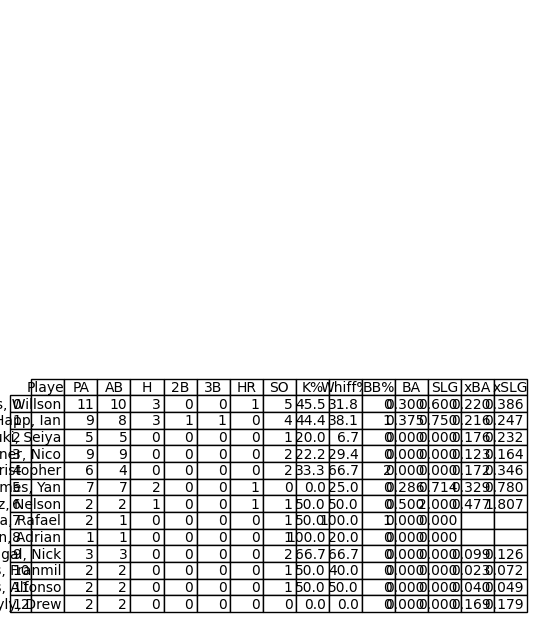

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 
# EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.axis('tight')
ax.axis('off')
Table = table(ax, Team_DF)  # where df is your data frame
Table.auto_set_font_size(False)
Table.set_fontsize(10)
ax
#plt.savefig('mytable.png')

In [98]:
fig = plt.figure(figsize = (8, 2))
ax = fig.add_subplot(111)

ax.table(cellText = team_DF.values,
          rowLabels = team_DF.index,
          colLabels = team_DF.columns,
          loc = "center"
         )
ax.set_title("Top 10 Fields of Research by Aggregated Funding Amount")

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def render_mpl_table(data, col_width=8.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(Team_DF, header_columns=0, col_width=2.5)
fig


AttributeError: 'Styler' object has no attribute 'shape'

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed